In [1]:
import numpy as np
# Nos va a servir para funciones que contengan elementos algebraicos

import pandas as pd

df_train_total = pd.read_csv("../dataset/fashion-mnist_train.csv")
df_train_total.shape

(60000, 785)

In [2]:
X_total = df_train_total[df_train_total.columns[1:]].values
y_total = df_train_total["label"].values.reshape(-1, 1)

In [3]:
prendas = np.array(["Remera/Top", "Pantalon", "Pullover", "Vestido", "Saco", "Sandalia", "Camisa", "Zapatilla", "Bolso", "Bota"])

In [4]:
def muestra(cant):
    df_train_custom = df_train_total.sample(cant)
    X_custom = df_train_custom[df_train_custom.columns[1:]].values
    y_custom = df_train_custom["label"].values
    
    return df_train_custom, X_custom, y_custom

In [59]:
df_train, X_train, y_train = muestra(10000)
print(f"Ahora tengo {len(X_train)} instancias de entrenamiento")

Ahora tengo 10000 instancias de entrenamiento


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import umap

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score

# Acá pueden cambiar el clasificador nuestro por el de sklearn!

clf = KNeighborsClassifier(100)

clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [7]:
%%time
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print("Accuracy: {}".format(acc))

NameError: name 'X_val' is not defined

In [8]:
def KFoldKNN(k, X, y):
    kfold = KFold(10)
    accuracyArr = []
    
    for i, fold in kfold.split(X):
        
        X_train = X[i]
        y_train = y[i]
        
        X_test = X[fold]
        y_test = y[fold]
        
        # Metodo kNN
        kNN = KNeighborsClassifier(k)
        
        kNN.fit(X_train, y_train)

        y_pred = kNN.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        accuracyArr.append(acc)
        
    accuracyArr = np.asarray(accuracyArr)
    mediaAccuracy = np.mean(accuracyArr)
    
    return mediaAccuracy


In [9]:
import time
def estudio_k(k, X, y):
    accuracyList = []
    timeList = []
    for i in range(1, k):
        start = time.time()
        mediaAccuracy = KFoldKNN(int(i), X, y)
        accuracyList.append(mediaAccuracy)
        end = time.time()
        timeList.append(end-start)
    accuracyList = np.asarray(accuracyList)
    timeList = np.asarray(timeList)  
    return accuracyList, timeList

In [10]:
def estudio_alfa_PCA(a, k, X, y):
    accuracyList = []
    timeList = []
    for i in range(1, a):
        # Realizo redimension
        myPCA = PCA(n_components=int(i))
        myPCA.fit(X)
        X_PCA_train = myPCA.transform(X)
        
        # Aplico kNN como siempre
        start = time.time()
        mediaAccuracy = KFoldKNN(k, X_PCA_train, y)
        accuracyList.append(mediaAccuracy)
        end = time.time()
        timeList.append(end-start)

    accuracyList = np.asarray(accuracyList)
    timeList = np.asarray(timeList) 
    return accuracyList, timeList

In [11]:
def estudio_k_PCA(k, a, X, y):
    accuracyList = []
    timeList = []   
    myPCA = PCA(n_components=int(a))
    myPCA.fit(X)
    X_PCA_train = myPCA.transform(X)
    for i in range(1, k):
        start = time.time()
        mediaAccuracy = KFoldKNN(int(i), X_PCA_train, y)
        accuracyList.append(mediaAccuracy)
        end = time.time()
        timeList.append(end-start)
        
    accuracyList = np.asarray(accuracyList)
    timeList = np.asarray(timeList)    
    return accuracyList, timeList

In [12]:
def estudio_componentes_TSNE(a, k, X, y):
    accuracyList = []
    timeList = []
    for i in range(1, a):
        # Realizo redimension
        myTSNE = TSNE(n_components=int(i))
        X_TSNE_train = myTSNE.fit_transform(X)
        
        # Aplico kNN como siempre
        start = time.time()
        mediaAccuracy = KFoldKNN(k, X_TSNE_train, y)
        accuracyList.append(mediaAccuracy)
        end = time.time()
        timeList.append(end-start)
    
    accuracyList = np.asarray(accuracyList)
    timeList = np.asarray(timeList)
    return accuracyList, timeList

In [13]:
def estudio_perplexity_TSNE(k, a, n, X, y):
    accuracyList = []
    timeList = []
    for i in range(1, n):
        # Realizo redimension con neuvas perplexities
        myTSNE = TSNE(n_components=int(a), perplexity=int(i))
        X_TSNE_train = myTSNE.fit_transform(X)
        
        # Aplico kNN como siempre
        start = time.time()
        mediaAccuracy = KFoldKNN(k, X_TSNE_train, y)
        accuracyList.append(mediaAccuracy)
        end = time.time()
        timeList.append(end-start)
    
    accuracyList = np.asarray(accuracyList)
    timeList = np.asarray(timeList)
    return accuracyList, timeList

In [14]:
def estudio_componentes_UMAP(a, k, X, y):
    accuracyList = []
    timeList = []
    for i in range(1, a):
        # Realizo redimension
        UMAP = umap.UMAP(n_components=int(i))
        X_UMAP_train = UMAP.fit_transform(X)
        
        # Aplico kNN como siempre
        start = time.time()
        mediaAccuracy = KFoldKNN(k, X_UMAP_train, y)
        accuracyList.append(mediaAccuracy)
        end = time.time()
        timeList.append(end-start)
        
    accuracyList = np.asarray(accuracyList)
    timeList = np.asarray(timeList)
    return accuracyList, timeList

In [15]:
def estudio_min_dist_UMAP(k, a, n, X, y):
    accuracyList = []
    timeList = []
    distList = np.linspace(0.1,1,n)
    for i in range(0, distList.size):
        # Realizo redimension con distinta distancia minima
        UMAP = umap.UMAP(n_components=int(a), min_dist=distList[int(i)])
        X_UMAP_train = UMAP.fit_transform(X)
        
        # Aplico kNN como siempre
        start = time.time()
        mediaAccuracy = KFoldKNN(k, X_UMAP_train, y)
        accuracyList.append(mediaAccuracy)
        end = time.time()
        timeList.append(end-start)
        
    accuracyList = np.asarray(accuracyList)
    timeList = np.asarray(timeList)
    return accuracyList, timeList

In [16]:
def transformacionPCA(n, X, y):
    myPCA = PCA(n_components=n)
    myPCA.fit(X)
    X_PCA_train = myPCA.transform(X)
    return X_PCA_train

def transformacionTSNE(n, X, y):
    myTSNE = TSNE(n_components = n, perplexity = 18)
    X_TSNE_train = myTSNE.fit_transform(X)
    return X_TSNE_train

def transformacionUMAP(n, X, y): 
    UMAP = umap.UMAP(n_components=n, min_dist=0.99)
    X_UMAP_train = UMAP.fit_transform(X)
    return X_UMAP_train

In [60]:
%%time
heatPCAMax = transformacionPCA(114, X_train, y_train)
heatUMAPMax = transformacionUMAP(15, X_train, y_train)
heatTSNEMax = transformacionTSNE(3, X_train, y_train)

heatPCA2D = transformacionPCA(2, X_train, y_train)
heatUMAP2D = transformacionUMAP(2, X_train, y_train)
heatTSNE2D = transformacionTSNE(2, X_train, y_train)

/home/tincho/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/tincho/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/tincho/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/tincho/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: user 9min 10s, sys: 9.94 s, total: 9min 20s
Wall time: 1min 53s


In [24]:
import flameplot as flameplot

In [20]:
PCAvsTSNEMax= flameplot.compare(heatPCAMax, heatTSNEMax, n_steps=5)

100%|██████████| 50/50 [01:02<00:00,  1.26s/it]


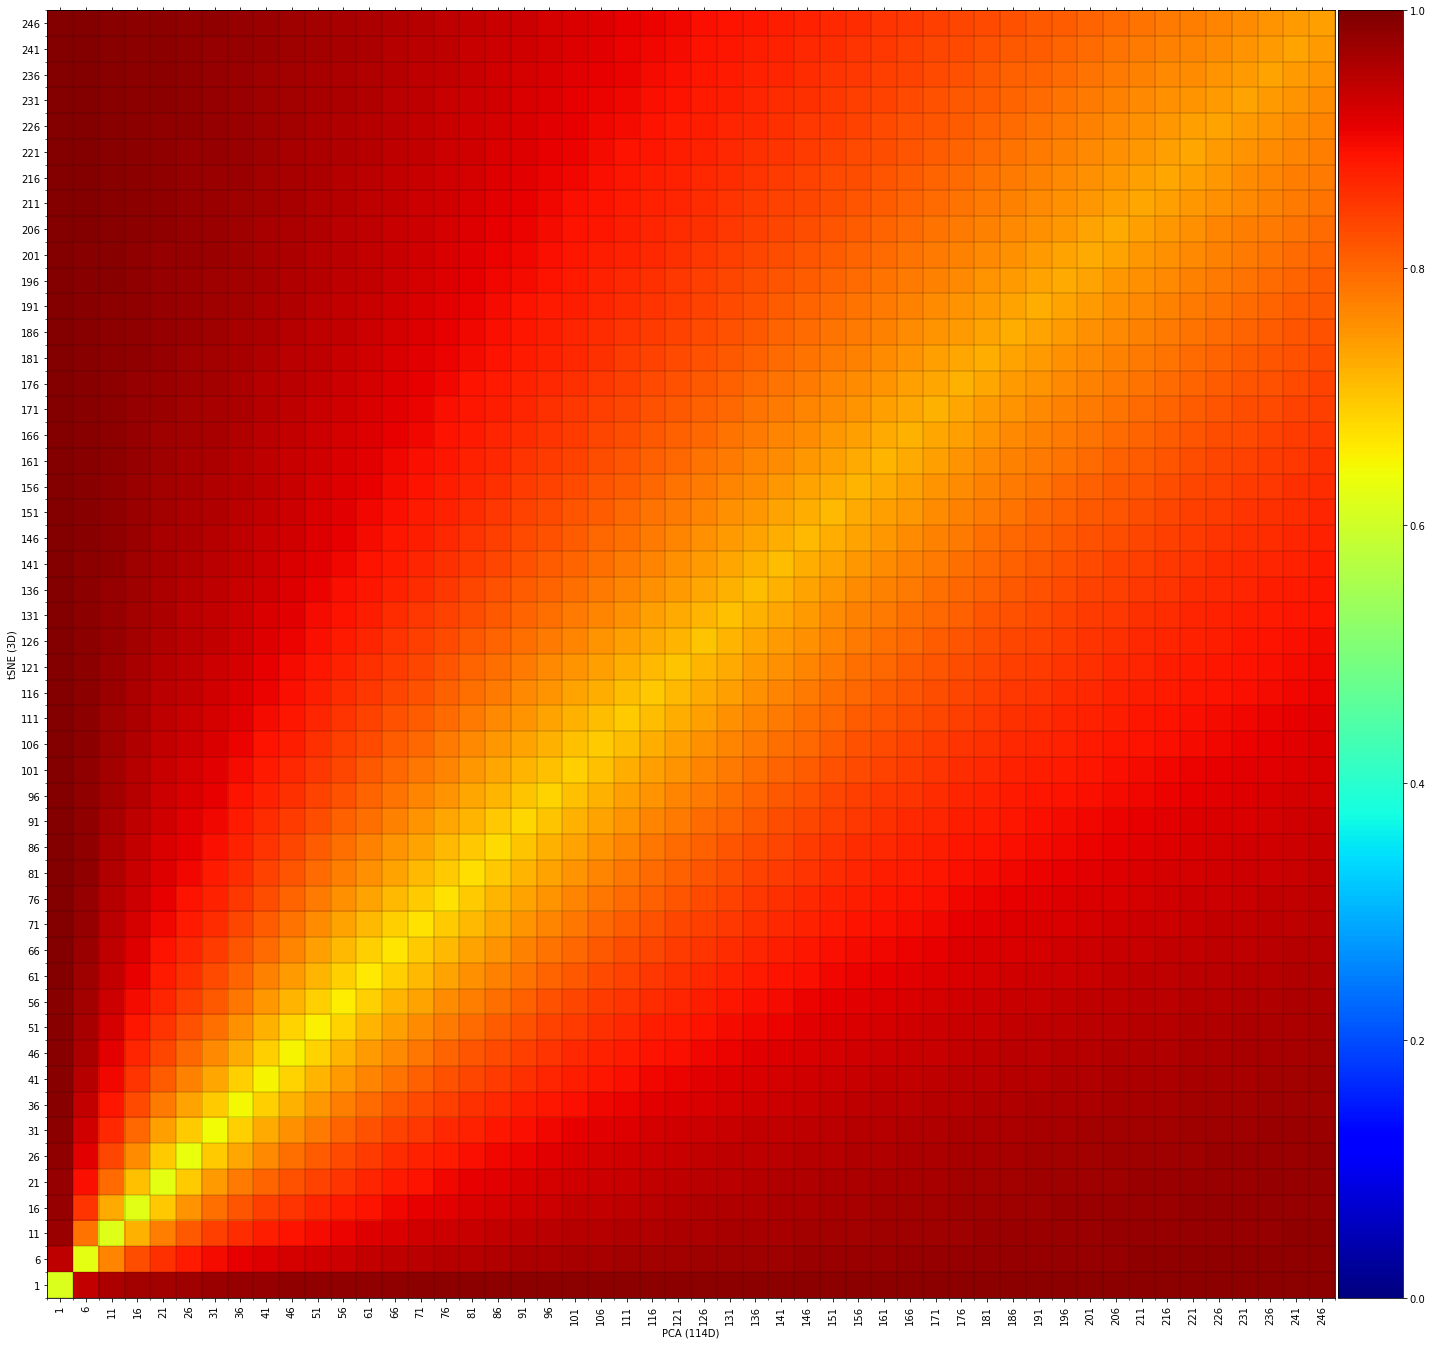

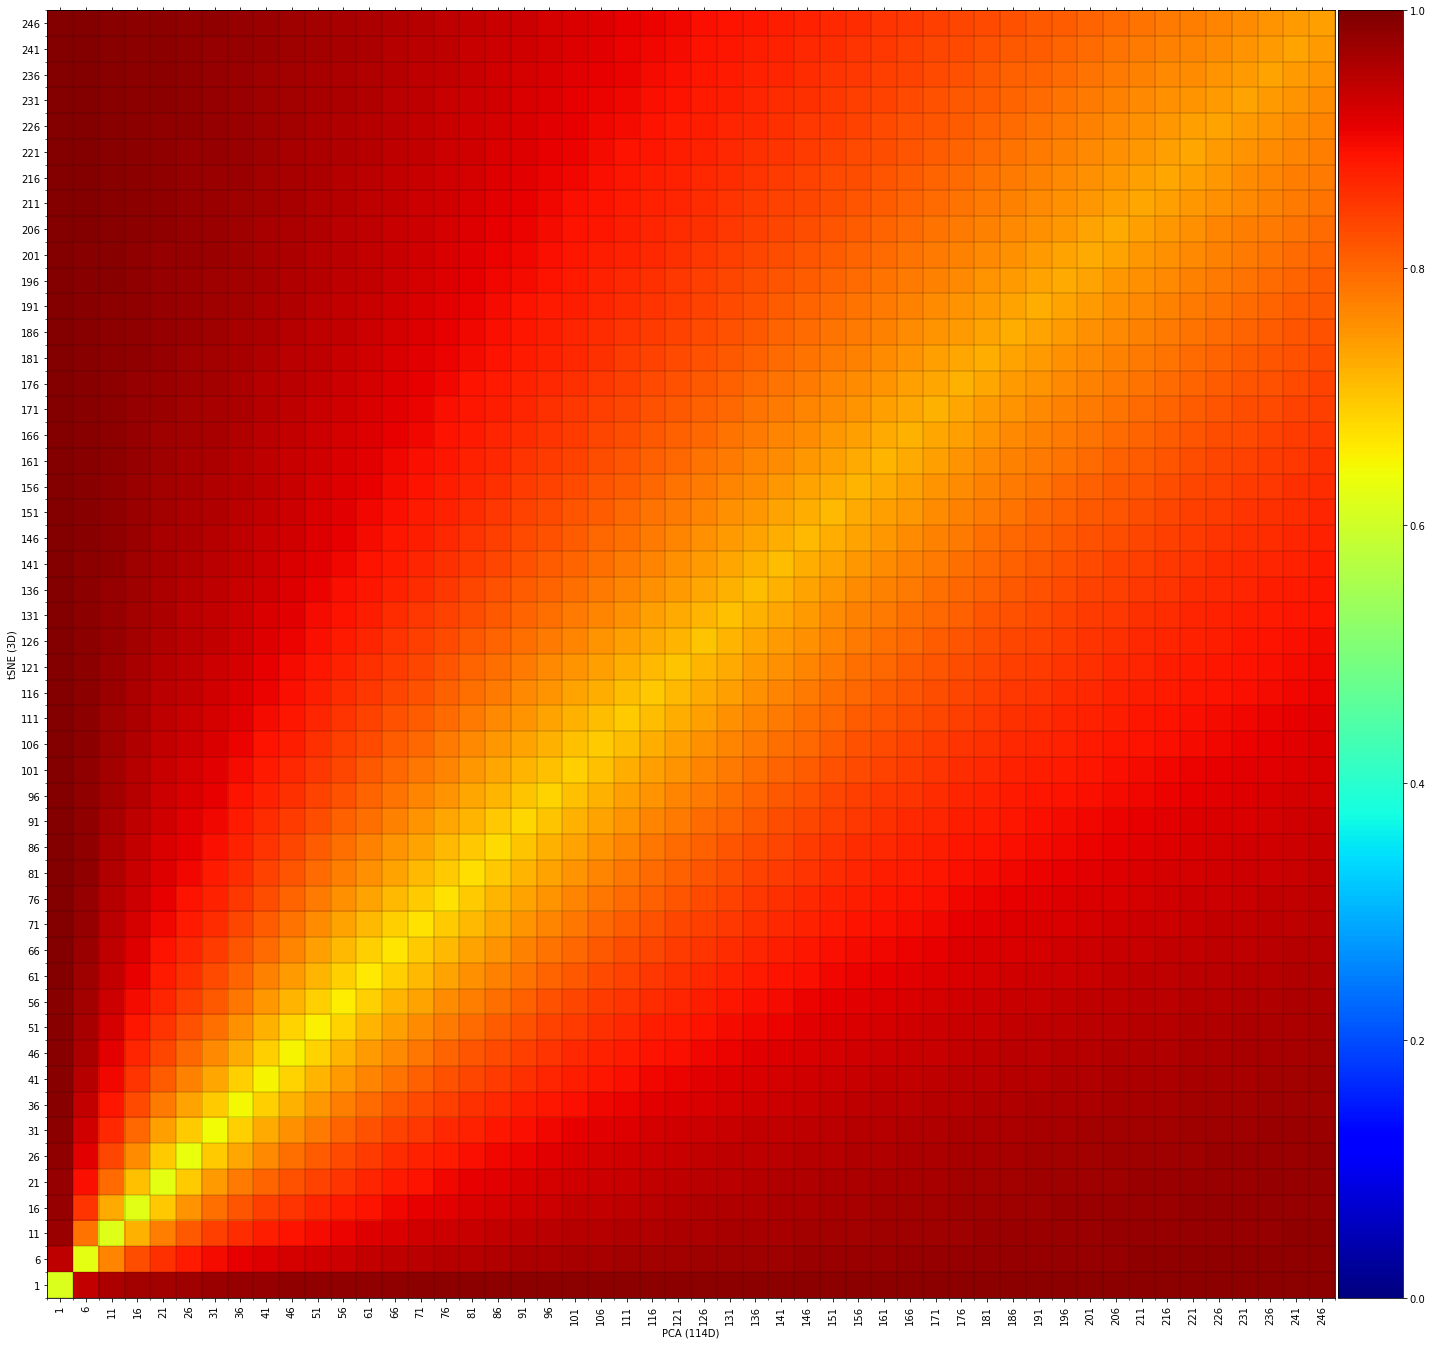

In [21]:
flameplot.plot(PCAvsTSNEMax, xlabel='PCA (114D)', ylabel='tSNE (3D)')

In [22]:
PCAvsUMAP2d = flameplot.compare(heatPCA2D, heatUMAP2D, n_steps=5)

100%|██████████| 50/50 [01:02<00:00,  1.26s/it]


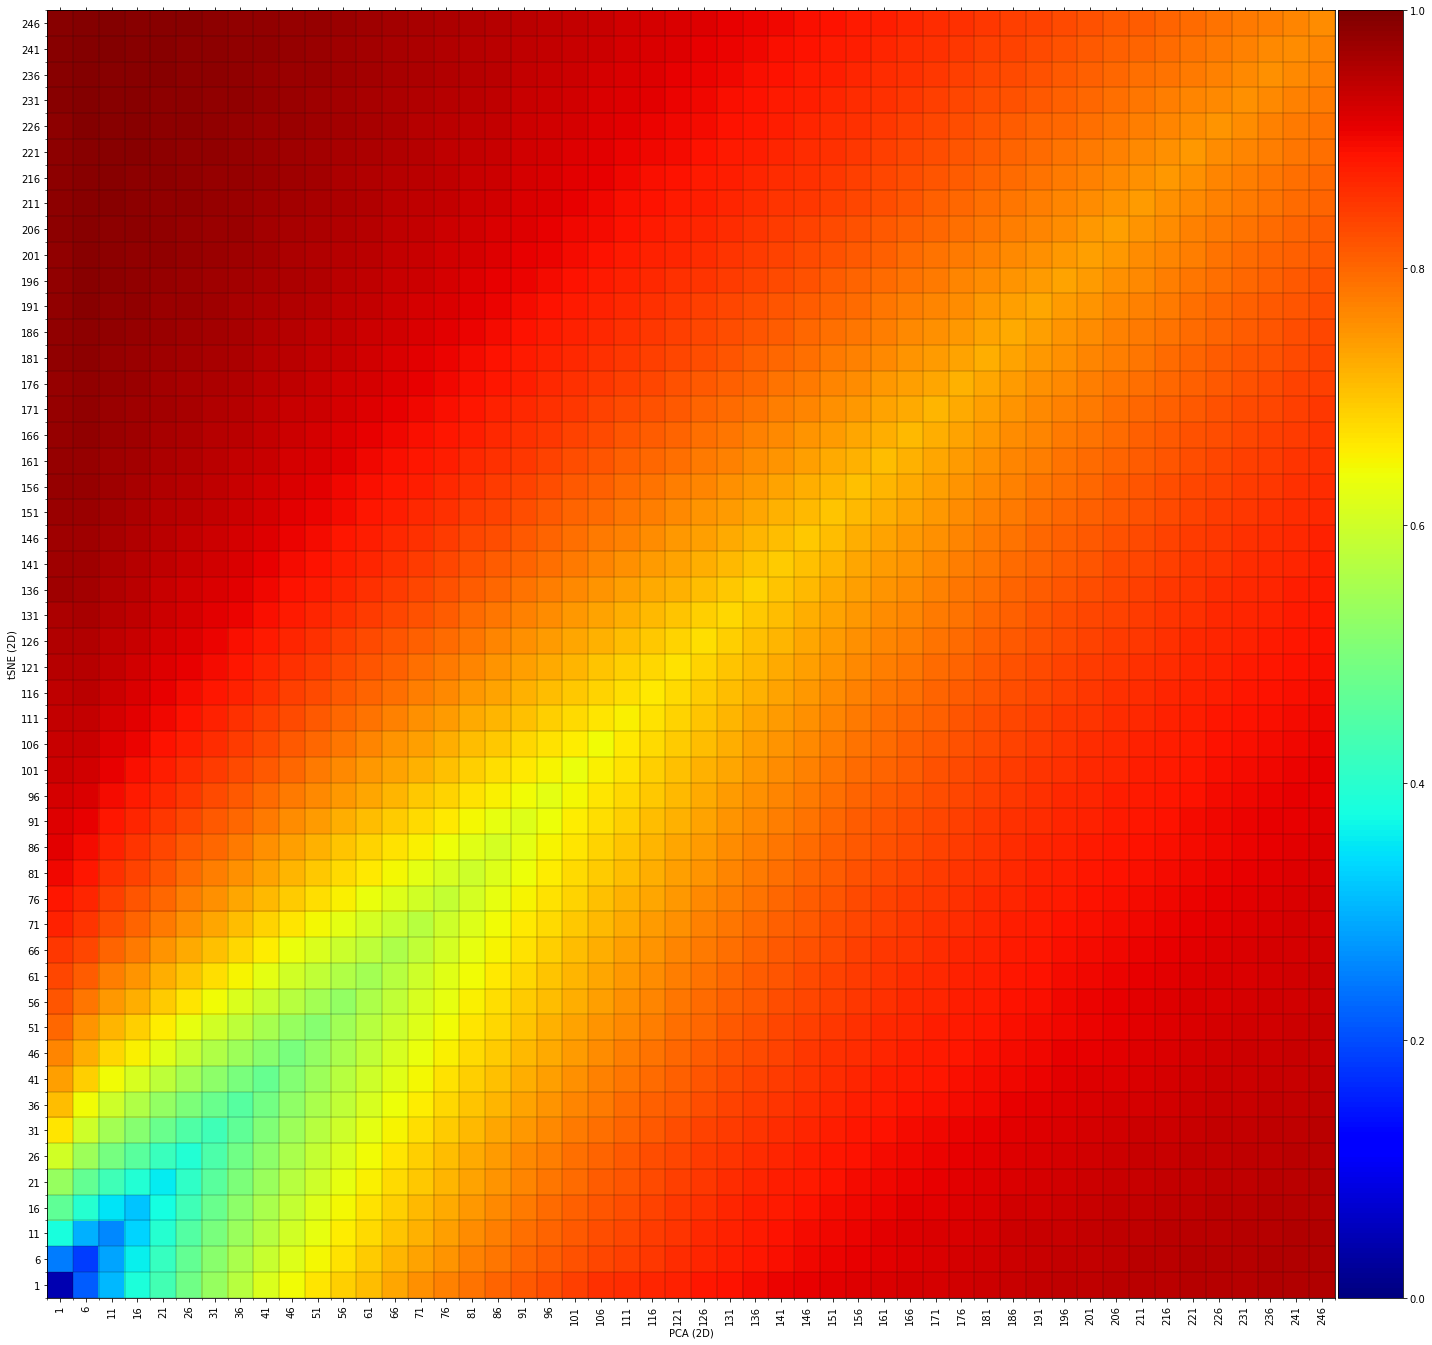

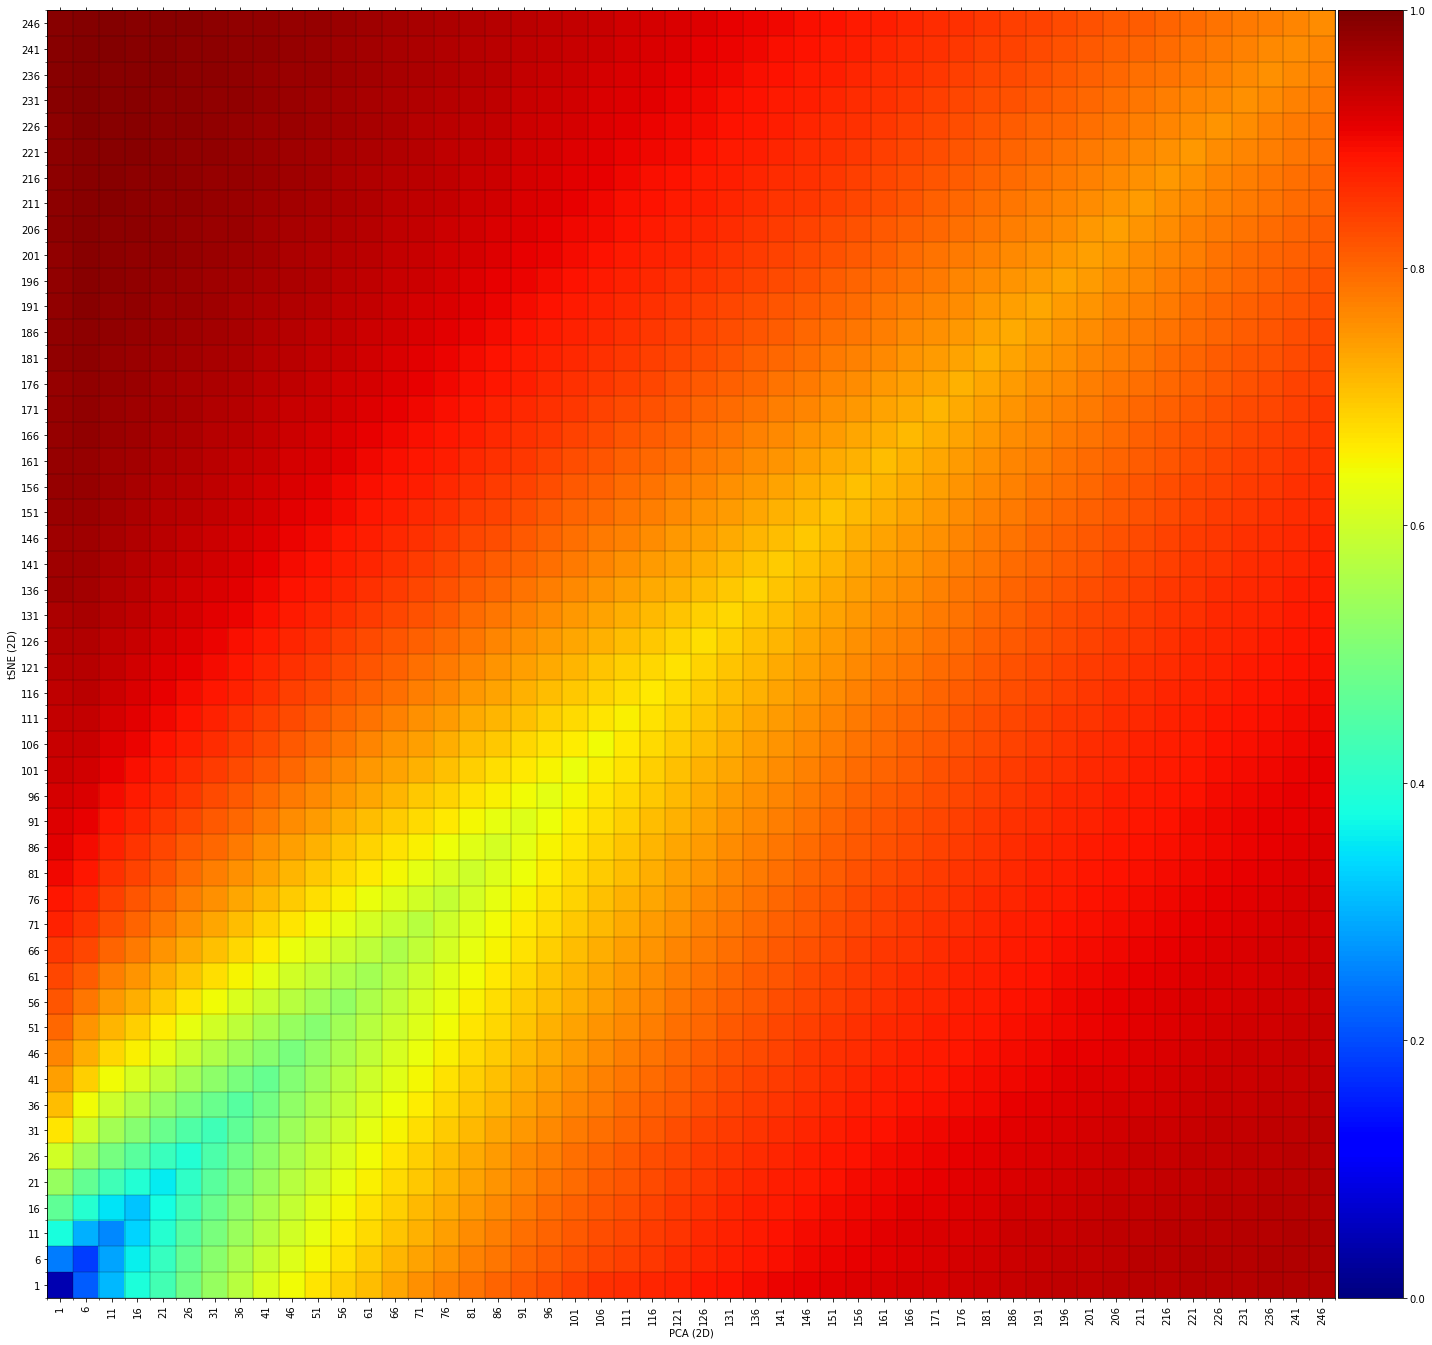

In [23]:
flameplot.plot(PCAvsUMAP2d, xlabel='PCA (2D)', ylabel='tSNE (2D)')

In [61]:

etiquetas = list(df_train['label'])
for i in range(0,len(etiquetas)):
        etiquetas[i] = prendas[etiquetas[i]]
print(etiquetas)

['Pullover', 'Pullover', 'Pantalon', 'Remera/Top', 'Bolso', 'Bota', 'Camisa', 'Camisa', 'Pullover', 'Camisa', 'Remera/Top', 'Vestido', 'Saco', 'Zapatilla', 'Vestido', 'Saco', 'Pullover', 'Bolso', 'Remera/Top', 'Pantalon', 'Bolso', 'Pantalon', 'Vestido', 'Pullover', 'Remera/Top', 'Camisa', 'Pullover', 'Camisa', 'Pantalon', 'Camisa', 'Camisa', 'Sandalia', 'Pullover', 'Bolso', 'Zapatilla', 'Saco', 'Camisa', 'Pantalon', 'Pantalon', 'Pullover', 'Saco', 'Remera/Top', 'Remera/Top', 'Vestido', 'Zapatilla', 'Remera/Top', 'Vestido', 'Remera/Top', 'Bolso', 'Saco', 'Remera/Top', 'Bolso', 'Bolso', 'Camisa', 'Bolso', 'Sandalia', 'Vestido', 'Zapatilla', 'Pullover', 'Zapatilla', 'Zapatilla', 'Saco', 'Camisa', 'Saco', 'Bota', 'Vestido', 'Saco', 'Sandalia', 'Saco', 'Bota', 'Sandalia', 'Remera/Top', 'Remera/Top', 'Vestido', 'Saco', 'Zapatilla', 'Pullover', 'Remera/Top', 'Bota', 'Vestido', 'Pullover', 'Zapatilla', 'Camisa', 'Saco', 'Vestido', 'Saco', 'Sandalia', 'Pantalon', 'Saco', 'Vestido', 'Saco', 'Bot

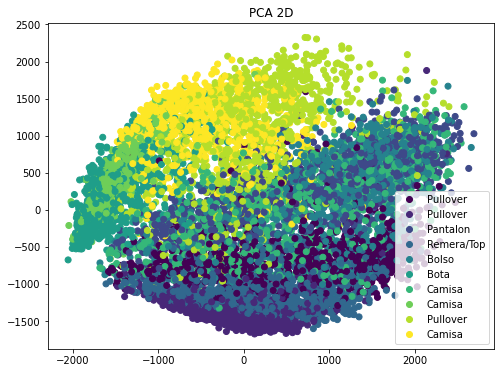

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
plot = plt.scatter(heatPCA2D[:,0], heatPCA2D[:,1], c=y_train)
plt.legend(handles=plot.legend_elements()[0], labels = list(etiquetas))
plt.title("PCA 2D")
plt.savefig("Imagenes/graficoPCA2d.png")

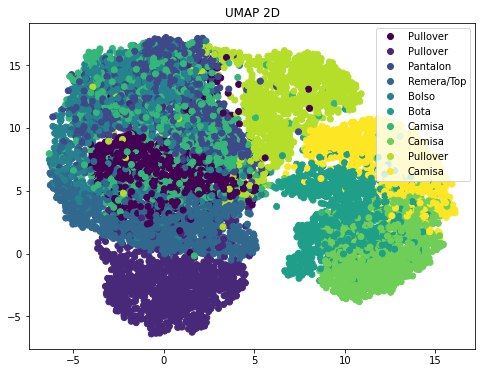

In [63]:
plt.figure(figsize=(8,6))
plot = plt.scatter(heatUMAP2D[:,0], heatUMAP2D[:,1], c=y_train)
plt.legend(handles=plot.legend_elements()[0], labels = list(etiquetas))
plt.title("UMAP 2D")
plt.savefig("Imagenes/graficoUMAP2d.png")

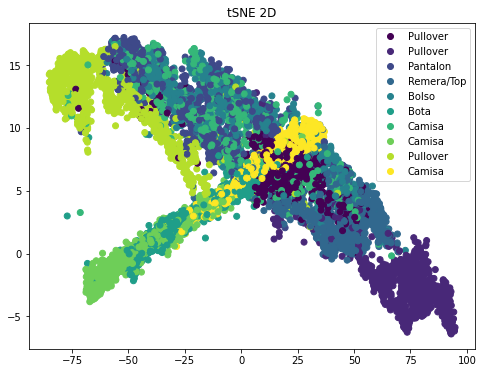

In [64]:

plt.figure(figsize=(8,6))
plot = plt.scatter(heatTSNE2D[:,0], heatUMAP2D[:,1], c=y_train)
plt.legend(handles=plot.legend_elements()[0], labels = list(etiquetas))
plt.title("tSNE 2D")
plt.savefig("Imagenes/graficoTSNE2d.png")